In [5]:
from transformers import pipeline
import sys
import os
import platform
import transformers

os.environ['HF_HOME'] = 'D:\Z_Model\hf'
os.environ['HF_HUB_CACHE'] = 'D:\Z_Model\hf\hub'

In [6]:
# 仅指定任务时，使用默认模型（不推荐）
pipe = pipeline("sentiment-analysis")
pipe("今儿上海可真冷啊")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
E:\02_Python\00_Env-Path-Install\anaconda3\envs\AliOpenAPI\Lib\site-packages\huggingface_hub\file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


[{'label': 'NEGATIVE', 'score': 0.8957217335700989}]

In [31]:
pipe("Today Shanghai is really cold.")

[{'label': 'NEGATIVE', 'score': 0.9995032548904419}]

In [32]:
pipe("我觉得这家店蒜泥白的味道一般")

[{'label': 'NEGATIVE', 'score': 0.9079708456993103}]

In [5]:
text_list = [
    "Today Shanghai is really cold.",
    "I think the taste of the garlic mashed pork in this store is average.",
    "You learn things really quickly. You understand the theory class as soon as it is taught."
]

pipe(text_list)

[{'label': 'NEGATIVE', 'score': 0.9995032548904419},
 {'label': 'NEGATIVE', 'score': 0.9984821677207947},
 {'label': 'POSITIVE', 'score': 0.9961802959442139}]

In [9]:
from transformers import pipeline

classifier = pipeline(task="ner")

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision f2482bf (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

E:\02_Python\00_Env-Path-Install\anaconda3\envs\AliOpenAPI\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Admin\.cache\huggingface\hub\models--dbmdz--bert-large-cased-finetuned-conll03-english. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Some weights of the model checkpoint at dbmdz/bert-large-case

tokenizer_config.json:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

In [20]:
preds = classifier("Hugging Face is a French company based in New York City.")
preds = [
    {
        "entity": pred["entity"],
        "score": round(pred["score"], 4),
        "index": pred["index"],
        "word": pred["word"],
        "start": pred["start"],
        "end": pred["end"],
    }
    for pred in preds
]
print(*preds, sep="\n")

{'entity': 'I-ORG', 'score': 0.9968, 'index': 1, 'word': 'Hu', 'start': 0, 'end': 2}
{'entity': 'I-ORG', 'score': 0.9293, 'index': 2, 'word': '##gging', 'start': 2, 'end': 7}
{'entity': 'I-ORG', 'score': 0.9763, 'index': 3, 'word': 'Face', 'start': 8, 'end': 12}
{'entity': 'I-MISC', 'score': 0.9983, 'index': 6, 'word': 'French', 'start': 18, 'end': 24}
{'entity': 'I-LOC', 'score': 0.999, 'index': 10, 'word': 'New', 'start': 42, 'end': 45}
{'entity': 'I-LOC', 'score': 0.9987, 'index': 11, 'word': 'York', 'start': 46, 'end': 50}
{'entity': 'I-LOC', 'score': 0.9992, 'index': 12, 'word': 'City', 'start': 51, 'end': 55}


使用设备: CPU

===== 情感分析模型对比 =====

正在测试模型: distilbert-base-uncased-finetuned-sst-2-english
文本: I absolutely love this product! It exceeded all my...
  情感: POSITIVE, 置信度: 0.9999, 耗时: 0.0473秒
文本: The movie was okay, not the best I've seen but cer...
  情感: NEGATIVE, 置信度: 0.8011, 耗时: 0.0443秒
文本: The package arrived on time as scheduled....
  情感: POSITIVE, 置信度: 0.9200, 耗时: 0.0393秒
文本: I wasn't really impressed with the service, but it...
  情感: POSITIVE, 置信度: 0.5473, 耗时: 0.0448秒
文本: This is the worst experience I've ever had with an...
  情感: NEGATIVE, 置信度: 0.9997, 耗时: 0.0473秒
文本: Oh great, another rainy day. Just what I needed fo...
  情感: POSITIVE, 置信度: 0.9980, 耗时: 0.0452秒
文本: The food was delicious but the service was so slow...
  情感: NEGATIVE, 置信度: 0.9997, 耗时: 0.0406秒

模型 distilbert-base-uncased-finetuned-sst-2-english 总结:
  平均推理时间: 0.0441秒
  总耗时 (包括加载): 2.1415秒
  模型大小: 67.0M 参数

正在测试模型: nlptown/bert-base-multilingual-uncased-sentiment
文本: I absolutely love this product! It exceeded all my..

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

加载模型 cardiffnlp/twitter-roberta-base-sentiment 失败: Failed to import transformers.models.roberta.modeling_roberta because of the following error (look up to see its traceback):
cannot import name 'EncoderDecoderCache' from 'transformers.cache_utils' (E:\02_Python\00_Env-Path-Install\anaconda3\envs\AliOpenAPI\Lib\site-packages\transformers\cache_utils.py)

正在测试模型: textattack/bert-base-uncased-SST-2-finetuned
加载模型 textattack/bert-base-uncased-SST-2-finetuned 失败: textattack/bert-base-uncased-SST-2-finetuned is not a local folder and is not a valid model identifier listed on 'https://huggingface.co/models'
If this is a private repository, make sure to pass a token having permission to this repo either by logging in with `huggingface-cli login` or by passing `token=<your_token>`

正在测试模型: siebert/sentiment-roberta-large-english


tokenizer_config.json:   0%|          | 0.00/256 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/687 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

加载模型 siebert/sentiment-roberta-large-english 失败: Failed to import transformers.models.roberta.modeling_roberta because of the following error (look up to see its traceback):
cannot import name 'EncoderDecoderCache' from 'transformers.cache_utils' (E:\02_Python\00_Env-Path-Install\anaconda3\envs\AliOpenAPI\Lib\site-packages\transformers\cache_utils.py)

===== 情感分析模型性能对比 =====
模型名称                                                         | 平均推理时间(秒)            | 模型大小
----------------------------------------------------------------------------------------------------
distilbert-base-uncased-finetuned-sst-2-english              | 0.0441               | 67.0M 参数
nlptown/bert-base-multilingual-uncased-sentiment             | 0.0830               | 167.4M 参数


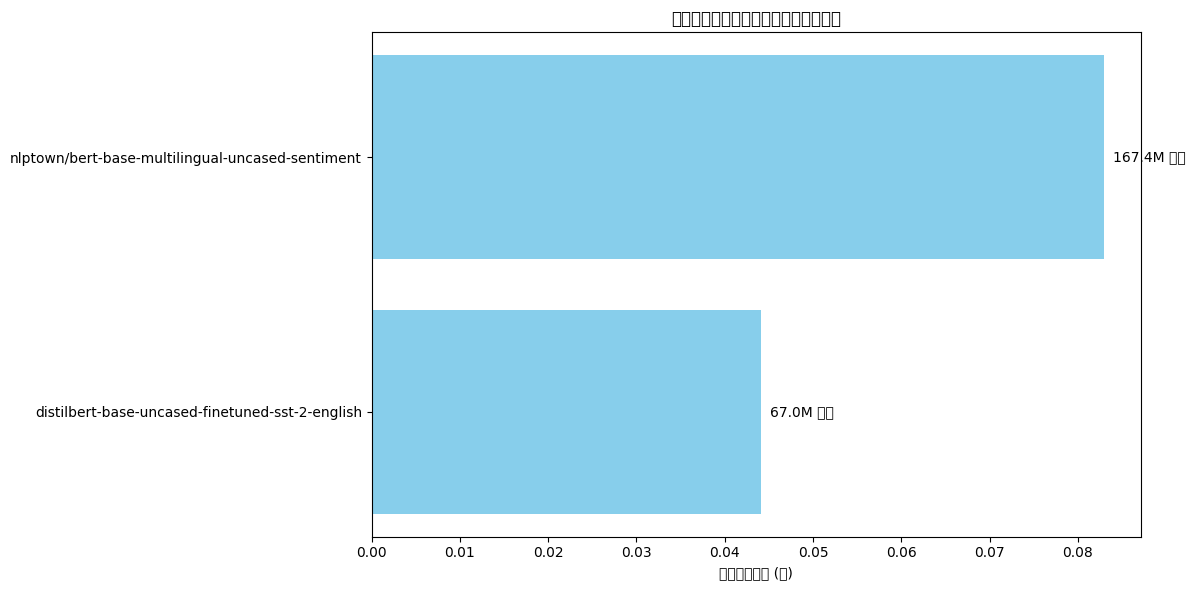


===== 模型在不同情感类型文本上的表现 =====

明显积极文本分析:
模型名称                                                         | 预测情感            | 置信度       
------------------------------------------------------------------------------------------
distilbert-base-uncased-finetuned-sst-2-english              | POSITIVE        | 0.9999
nlptown/bert-base-multilingual-uncased-sentiment             | 5 stars         | 0.9756

轻微积极文本分析:
模型名称                                                         | 预测情感            | 置信度       
------------------------------------------------------------------------------------------
distilbert-base-uncased-finetuned-sst-2-english              | NEGATIVE        | 0.8011
nlptown/bert-base-multilingual-uncased-sentiment             | 3 stars         | 0.8667

中性文本分析:
模型名称                                                         | 预测情感            | 置信度       
------------------------------------------------------------------------------------------
distilbert-base-uncased-finetuned-sst-2

In [24]:
import time
import torch
import matplotlib.pyplot as plt
from transformers import pipeline, AutoModelForSequenceClassification, AutoTokenizer

# 设置设备
device = 0 if torch.cuda.is_available() else -1
print(f"使用设备: {'GPU' if device == 0 else 'CPU'}")

# 定义要比较的情感分析模型
sentiment_models = [
    "distilbert-base-uncased-finetuned-sst-2-english",  # 轻量级模型
    "nlptown/bert-base-multilingual-uncased-sentiment",  # 多语言模型
    "cardiffnlp/twitter-roberta-base-sentiment",        # Twitter领域模型
    "textattack/bert-base-uncased-SST-2-finetuned",     # 对抗训练模型
    "siebert/sentiment-roberta-large-english"           # 大型模型
]

# 测试数据集 - 包含不同情感强度和场景的文本
test_texts = [
    # 明显积极
    "I absolutely love this product! It exceeded all my expectations and I would highly recommend it to everyone.",
    # 轻微积极
    "The movie was okay, not the best I've seen but certainly not the worst either.",
    # 中性
    "The package arrived on time as scheduled.",
    # 轻微消极
    "I wasn't really impressed with the service, but it wasn't terrible either.",
    # 明显消极
    "This is the worst experience I've ever had with any company. I will never use their services again!",
    # 带有讽刺的文本
    "Oh great, another rainy day. Just what I needed for my outdoor plans.",
    # 情感复杂的文本
    "The food was delicious but the service was so slow that it ruined the overall experience."
]

# 存储结果
results = {}

# 运行情感分析测试
print("\n===== 情感分析模型对比 =====")
for model_name in sentiment_models:
    print(f"\n正在测试模型: {model_name}")
    
    # 记录总时间（包括加载时间）
    total_start = time.time()
    
    # 加载模型和分词器
    try:
        # 显式加载模型和分词器，以便更好地控制
        tokenizer = AutoTokenizer.from_pretrained(model_name)
        model = AutoModelForSequenceClassification.from_pretrained(model_name)
        classifier = pipeline(
            "sentiment-analysis",
            model=model,
            tokenizer=tokenizer,
            device=device
        )
    except Exception as e:
        print(f"加载模型 {model_name} 失败: {str(e)}")
        continue
    
    # 记录推理时间
    inference_times = []
    model_results = []
    
    # 对每个测试文本进行分析
    for text in test_texts:
        start_time = time.time()
        result = classifier(text)
        end_time = time.time()
        
        # 计算推理时间
        inference_time = end_time - start_time
        inference_times.append(inference_time)
        
        # 存储结果
        model_results.append({
            "text": text,
            "result": result,
            "inference_time": inference_time
        })
        
        # 打印当前文本的分析结果
        print(f"文本: {text[:50]}...")
        for res in result:
            print(f"  情感: {res['label']}, 置信度: {res['score']:.4f}, 耗时: {inference_time:.4f}秒")
    
    # 计算平均推理时间
    avg_inference_time = sum(inference_times) / len(inference_times)
    total_time = time.time() - total_start
    
    # 保存模型结果
    results[model_name] = {
        "results": model_results,
        "avg_inference_time": avg_inference_time,
        "total_time": total_time,
        "model_size": f"{sum(p.numel() for p in model.parameters())/1e6:.1f}M 参数"
    }
    
    # 打印模型总结
    print(f"\n模型 {model_name} 总结:")
    print(f"  平均推理时间: {avg_inference_time:.4f}秒")
    print(f"  总耗时 (包括加载): {total_time:.4f}秒")
    print(f"  模型大小: {results[model_name]['model_size']}")

# 生成性能对比报告
print("\n===== 情感分析模型性能对比 =====")
print(f"{'模型名称':<60} | {'平均推理时间(秒)':<20} | {'模型大小'}")
print("-" * 100)
for model, data in results.items():
    print(f"{model:<60} | {data['avg_inference_time']:<20.4f} | {data['model_size']}")

# 可视化结果 - 平均推理时间对比
plt.figure(figsize=(12, 6))
model_names = list(results.keys())
avg_times = [results[model]['avg_inference_time'] for model in model_names]
model_sizes = [results[model]['model_size'] for model in model_names]

# 绘制平均推理时间条形图
bars = plt.barh(model_names, avg_times, color='skyblue')
plt.xlabel('平均推理时间 (秒)')
plt.title('不同情感分析模型的平均推理时间对比')

# 在条形旁添加模型大小信息
for bar, size in zip(bars, model_sizes):
    width = bar.get_width()
    plt.text(width + 0.001, bar.get_y() + bar.get_height()/2, 
             f'{size}', va='center')

plt.tight_layout()
plt.savefig('sentiment_model_inference_time.png')
plt.show()

# 分析模型在不同情感类型文本上的表现
print("\n===== 模型在不同情感类型文本上的表现 =====")
text_categories = [
    "明显积极", "轻微积极", "中性", 
    "轻微消极", "明显消极", "讽刺文本", "复杂情感"
]

for i, category in enumerate(text_categories):
    print(f"\n{category}文本分析:")
    print(f"{'模型名称':<60} | {'预测情感':<15} | {'置信度':<10}")
    print("-" * 90)
    for model, data in results.items():
        result = data['results'][i]['result'][0]
        print(f"{model:<60} | {result['label']:<15} | {result['score']:.4f}")
    

In [70]:
import time
from transformers import pipeline, T5ForConditionalGeneration, T5Tokenizer

# 输入文本
text = "translate English to French: Hugging Face is a community-based open-source platform for machine learning."

# 定义对比函数
def run_translation(model_name):
    # 加载模型和tokenizer
    tokenizer = T5Tokenizer.from_pretrained(model_name)
    model = T5ForConditionalGeneration.from_pretrained(model_name)
    
    # 创建pipeline
    translator = pipeline("translation", model=model, tokenizer=tokenizer)
    
    # 记录推理时间
    start_time = time.time()
    result = translator(text)
    end_time = time.time()
    
    return {
        "model": model_name,
        "output": result[0]["translation_text"],
        "time": round(end_time - start_time, 4)  # 推理时间（秒）
    }

# 运行t5-small
small_result = run_translation("t5-small")
# 运行t5-base
base_result = run_translation("t5-base")

# 打印结果
print("翻译任务对比：")
print(f"t5-small: 输出={small_result['output']}，耗时={small_result['time']}s")
print(f"t5-base: 输出={base_result['output']}，耗时={base_result['time']}s")

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


翻译任务对比：
t5-small: 输出=Hugging Face est une tribune communautaire de l'apprentissage des machines.，耗时=1.0024s
t5-base: 输出=Hugging Face est une plate-forme libre basée sur la communauté pour l'apprentissage automatique.，耗时=2.3663s
